In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the dataset

 Variables in order:

 CRIM     per capita crime rate by town

 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    proportion of non-retail business acres per town

 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      nitric oxides concentration (parts per 10 million)

 RM       average number of rooms per dwelling

 AGE      proportion of owner-occupied units built prior to 1940

 DIS      weighted distances to five Boston employment centres

 RAD      index of accessibility to radial highways

 TAX      full-value property-tax rate per $10,000

 PTRATIO  pupil-teacher ratio by town

 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT    % lower status of the population

 MEDV     Median value of owner-occupied homes in $1000's

In [101]:
#boston_house=ds.load_boston() #--removed issue
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target = raw_df.values[1::2, 2]
cali_house=ds.fetch_california_housing()
cali_house_df= pd.DataFrame(cali_house.data,columns = cali_house.feature_names)
cali_house_df['HousePrice']=cali_house.target
cali_house_df.to_csv('california_housing.csv',index=False)
boston_house=pd.read_csv('housing.csv' )

In [102]:
#boston_house.head()
cali_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [103]:
#Checking the number of rows and columns
#boston_house.shape
cali_house_df.shape

(20640, 9)

In [104]:
# Check for missing values
#boston_house.isnull().sum()
cali_house_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

In [105]:
#stat measures of dataset
#boston_house.describe()
cali_house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Understanding the correlation between the various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [106]:
#correlation= boston_house.corr()
correlation= cali_house_df.corr()


<Axes: >

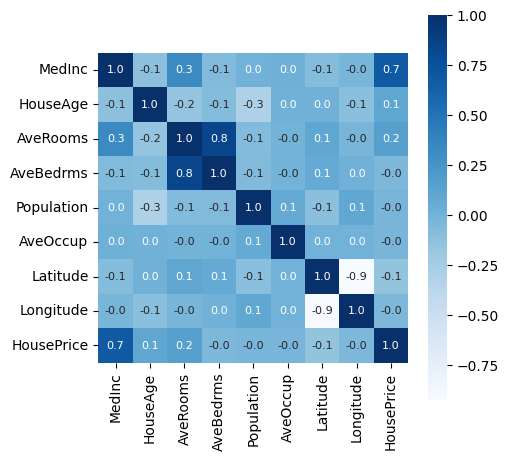

In [107]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=  True , fmt='.1f', annot=True, annot_kws={'size':8} ,cmap='Blues' )

Splitting the data (features) and Target (label)

In [108]:
#X= boston_house.drop(['Price'],axis=1)
#Y=boston_house['Price']
X= cali_house_df.drop(['HousePrice'],axis=1)
Y= cali_house_df['HousePrice']

# Splitting the data in Train and TEst Data

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# Model Training

XGBoost Regressor (Decision Tree Ensemble Model)


In [117]:
#loading the model
model= XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluation


Prediction on Training Data and Test Data

In [118]:
# Accuracy on prediction on train data
train_data_pred= model.predict(X_train)
# Accuracy on prediction on test data
test_data_pred= model.predict(X_test)

In [112]:
#print(train_data_pred)

In [119]:
# R-squared error
train_score_1 = metrics.r2_score(Y_train,train_data_pred)
# Mean absolute error
train_score_2 = metrics.mean_absolute_error(Y_train,train_data_pred)
# R-squared error
test_score_1 = metrics.r2_score(Y_test,test_data_pred)
# Mean absolute error
test_score_2 = metrics.mean_absolute_error(Y_test,test_data_pred)

In [120]:
print(train_score_1,train_score_2,test_score_1,test_score_2)

print("The r2 score accuracy on Train Data is {}%".format(round(train_score_1, 2) *100))
print("The r2 score accuracy on Test Data is {}%".format(round(test_score_1, 2) *100))
score1 = train_score_2
score2 = test_score_2
print("The Mean Absolute Error on Train Data is {}".format(round(score1, 2)))
print("The Mean Absolute Error on Test Data is {}".format(round(score2, 2)))

score1 = np.sqrt(train_score_2)
score2 = np.sqrt(test_score_2)
print("The Root Mean Squared Error on Train Data is {}".format(round(score1, 2)))
print("The Root Mean Squared Error on Test Data is {}".format(round(score2, 2)))

0.9439154002012755 0.19333650655515577 0.8386188269983407 0.3008583316724222
The r2 score accuracy on Train Data is 94.0%
The r2 score accuracy on Test Data is 84.0%
The Mean Absolute Error on Train Data is 0.19
The Mean Absolute Error on Test Data is 0.3
The Root Mean Squared Error on Train Data is 0.44
The Root Mean Squared Error on Test Data is 0.55


# Visualizing the actual and Predicted Prices

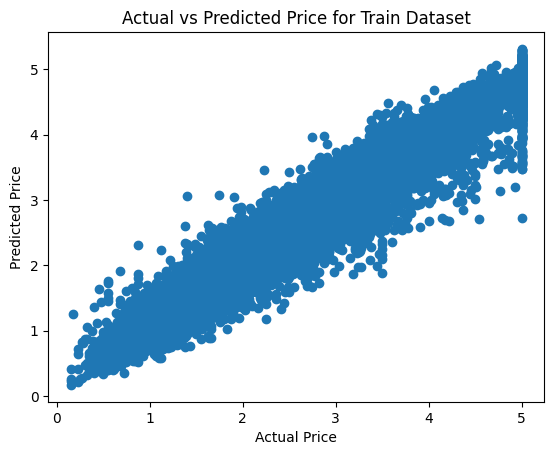

In [122]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Train Dataset")
plt.show()

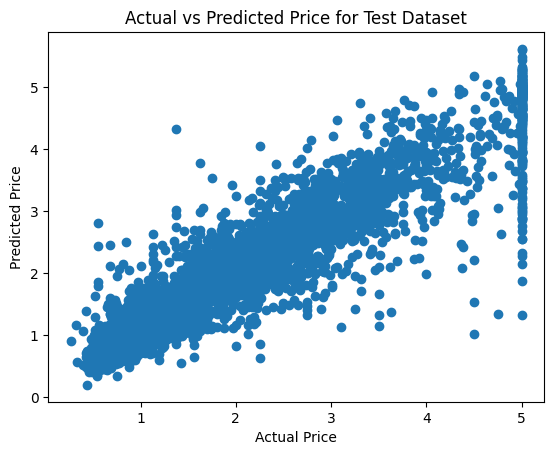

In [123]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Test Dataset")
plt.show()